In [51]:
import pandas as pd
import sqlite3
import zipfile
import matplotlib.pyplot as plt

In [4]:
! ls

CONTRIBUTING.md
LICENSE.md
README.md
Yue's_copy.ipynb
awesome.gif
movie_data_erd.jpeg
student.ipynb
zippedData


In [15]:
with zipfile.ZipFile('./zippedData/im.db.zip') as zipObj:
    zipObj.extractall(path='./zippedData/')
    

In [2]:
con = sqlite3.connect('zippedData/im.db')
cursor = con.cursor()


In [6]:
schema_df = pd.read_sql("""
                        SELECT *
                        FROM sqlite_master """, con)
schema_df

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [7]:
df_rating = pd.read_sql("""
                        SELECT *
                        FROM movie_ratings """, con)
df_rating.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [50]:
df_basics = pd.read_sql("""
                        SELECT *
                        FROM movie_basics """, con)
df_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [158]:
df_basics.loc[df_basics['movie_id']=='tt1042974']

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
4721,tt1042974,Just Inès,Just Inès,2010,90.0,Drama


In [132]:
movie_title_rating = pd.read_sql("""
                                    SELECT 
                                        movie_ratings.movie_id, movie_ratings.averagerating, movie_akas.title
                                    FROM 
                                        movie_ratings
                                        LEFT JOIN movie_akas
                                            ON movie_ratings.movie_id = movie_akas.movie_id
                                    
                                    GROUP BY
                                        movie_ratings.movie_id""", con)
movie_title_rating.sort_values(by='averagerating', ascending=False).head(50)

,movie_id,averagerating,title
51109,tt5089804,10.0,Fly High: Story of the Disc Dog
65944,tt7259300,10.0,Calamity Kevin
71577,tt8730716,10.0,None
73616,tt9715646,10.0,None
65755,tt7227500,10.0,Ellis Island: The Making of a Master Race in A...
878,tt10378660,10.0,None
64646,tt6991826,10.0,A Dedicated Life: Phoebe Brand and the Legacy ...
9745,tt1770682,10.0,Freeing Bernie Baran
702,tt10176328,10.0,Exteriores: Mulheres Brasileiras na Diplomacia
49925,tt4944240,10.0,Dog Days in the Heartland


In [9]:
movie_titles_rating = pd.read_sql("""
                                    SELECT 
                                        movie_ratings.movie_id, movie_ratings.averagerating, movie_basics.primary_title AS movie
                                    FROM 
                                        movie_ratings
                                        LEFT JOIN movie_basics
                                            ON movie_ratings.movie_id = movie_basics.movie_id
                                    
                                    """, con)
movie_titles_rating.head(50)

,movie_id,averagerating,movie
0,tt10356526,8.3,Laiye Je Yaarian
1,tt10384606,8.9,Borderless
2,tt1042974,6.4,Just Inès
3,tt1043726,4.2,The Legend of Hercules
4,tt1060240,6.5,Até Onde?
5,tt1069246,6.2,Habana Eva
6,tt1094666,7.0,The Hammer
7,tt1130982,6.4,The Night Clerk
8,tt1156528,7.2,Silent Sonata
9,tt1161457,4.2,Vanquisher


In [157]:
movie_titles_rating.loc[movie_titles_rating['movie_id']=='tt1042974']

,movie_id,averagerating,movie
2,tt1042974,6.4,Just Inès


In [10]:
df_bom = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
df_bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [11]:
df_rt_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')
df_rt_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [12]:
df_rt_review = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding='unicode escape')
df_rt_review.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [13]:
df_tmdb = pd.read_csv('zippedData/tmdb.movies.csv.gz')
df_tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [14]:
df_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
df_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [38]:
df_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.1+ KB


In [73]:
# df_budgets.sort_values(by='production_budget')

In [74]:
# df_budgets['production_budget'][0][0]

In [18]:
budget_rating_df = pd.merge(movie_titles_rating,df_budgets, on='movie')
budget_rating_df.head(50)

,movie_id,averagerating,movie,id,release_date,production_budget,domestic_gross,worldwide_gross,budgets,dom_gross,world_gross
0,tt1043726,4.2,The Legend of Hercules,42,"Jan 10, 2014","$70,000,000","$18,848,538","$58,953,319",70000000,18848538,58953319
1,tt1094666,7.0,The Hammer,50,"Mar 21, 2008","$850,000","$442,638","$442,638",850000,442638,442638
2,tt3096900,6.5,The Hammer,50,"Mar 21, 2008","$850,000","$442,638","$442,638",850000,442638,442638
3,tt1171222,5.1,Baggage Claim,38,"Sep 27, 2013","$8,500,000","$21,569,509","$22,885,836",8500000,21569509,22885836
4,tt1210166,7.6,Moneyball,15,"Sep 23, 2011","$50,000,000","$75,605,492","$111,300,835",50000000,75605492,111300835
5,tt1212419,6.5,Hereafter,61,"Oct 15, 2010","$50,000,000","$32,746,941","$108,660,270",50000000,32746941,108660270
6,tt1232829,7.2,21 Jump Street,44,"Mar 16, 2012","$42,000,000","$138,447,667","$202,812,429",42000000,138447667,202812429
7,tt1243974,5.4,Aloha,3,"May 29, 2015","$37,000,000","$21,052,030","$25,387,091",37000000,21052030,25387091
8,tt1261945,4.4,Sex and the City 2,16,"May 27, 2010","$95,000,000","$95,347,692","$294,680,778",95000000,95347692,294680778
9,tt1270761,5.6,Don't Be Afraid of the Dark,43,"Aug 26, 2011","$25,000,000","$24,046,682","$39,126,427",25000000,24046682,39126427


In [56]:
budget_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2875 entries, 0 to 2874
Data columns (total 11 columns):
movie_id             2875 non-null object
averagerating        2875 non-null float64
movie                2875 non-null object
id                   2875 non-null int64
release_date         2875 non-null object
production_budget    2875 non-null object
domestic_gross       2875 non-null object
worldwide_gross      2875 non-null object
budgets              2875 non-null int32
dom_gross            2875 non-null int32
world_gross          2875 non-null int64
dtypes: float64(1), int32(2), int64(2), object(6)
memory usage: 327.1+ KB


Text(0, 0.5, 'averagerating')

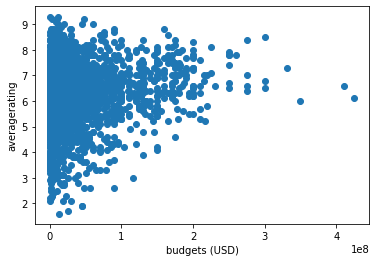

In [59]:
fig, ax = plt.subplots()
ax.scatter(x=budget_rating_df['budgets'], y=budget_rating_df['averagerating'])
ax.set_xlabel('budgets (USD)')
ax.set_ylabel('averagerating')

## Clean Budgets Table

In [27]:
df_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [28]:
"""All the numbers in this table need to be converted to integers"""

df_budgets['budgets(USD)'] = df_budgets['production_budget'].str.replace('$','').str.replace(',', '').astype(int)
df_budgets['dom_gross(USD)'] = df_budgets['domestic_gross'].str.replace('$','').str.replace(',', '').astype(int)
df_budgets['world_gross(USD)'] = df_budgets['worldwide_gross'].str.replace('$','').str.replace(',', '').astype('int64')

In [29]:
df_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,budgets(USD),dom_gross(USD),world_gross(USD)
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",317000000,620181382,1316721747


In [31]:
# keep the int columns only
budget_clean = df_budgets.drop(['production_budget','domestic_gross','worldwide_gross'], axis=1)

In [32]:
budget_clean.head()

,id,release_date,movie,budgets(USD),dom_gross(USD),world_gross(USD)
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


## Join movie_basics and budget_clean

In [35]:
# load movie_basics from the database
df_basics = pd.read_sql("""
                        SELECT 
                            primary_title AS movie, genres
                        FROM 
                            movie_basics """, con)

In [42]:
df_basics.loc[df_basics['movie']=='Avatar']

,movie,genres
17060,Avatar,Horror


In [36]:
#
movie_budget = budget_clean.merge(df_basics, on='movie')

In [60]:
movie_budget.head(50)

,id,release_date,movie,budgets(USD),dom_gross(USD),world_gross(USD),genres
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,"Action,Adventure,Sci-Fi"
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,"Action,Adventure,Sci-Fi"
5,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,"Action,Adventure,Fantasy"
6,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923,"Action,Adventure,Thriller"
7,11,"Jul 20, 2012",The Dark Knight Rises,275000000,448139099,1084439099,"Action,Thriller"
8,12,"May 25, 2018",Solo: A Star Wars Story,275000000,213767512,393151347,"Action,Adventure,Fantasy"
9,13,"Jul 2, 2013",The Lone Ranger,275000000,89302115,260002115,"Action,Adventure,Western"


In [43]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3815 entries, 0 to 3814
Data columns (total 7 columns):
id                  3815 non-null int64
release_date        3815 non-null object
movie               3815 non-null object
budgets(USD)        3815 non-null int32
dom_gross(USD)      3815 non-null int32
world_gross(USD)    3815 non-null int64
genres              3743 non-null object
dtypes: int32(2), int64(2), object(3)
memory usage: 208.6+ KB


In [48]:
movie_budget.loc[movie_budget['genres'].isna()]

,id,release_date,movie,budgets(USD),dom_gross(USD),world_gross(USD),genres
31,39,"May 14, 2010",Robin Hood,210000000,105487148,322459006,None
36,9,"Nov 21, 2018",Robin Hood,99000000,30824628,84747441,None
106,98,"Jun 19, 2015",Inside Out,175000000,356461711,854235992,None
107,98,"Jun 19, 2015",Inside Out,175000000,356461711,854235992,None
110,2,"Nov 22, 2017",Coco,175000000,209726015,798008101,None
320,93,"Apr 19, 2013",Oblivion,120000000,89107235,287916633,None
396,2,"Apr 18, 2014",Transcendence,100000000,23022309,103039258,None
462,78,"Apr 21, 2017",The Promise,90000000,8224288,10551417,None
595,18,"Jun 17, 1994",Wolf,70000000,65011757,131011757,None
686,88,"Dec 25, 2015",Joy,60000000,56451232,101134059,None
